<center><h1> Reconnaissance Faciale </h1></center>

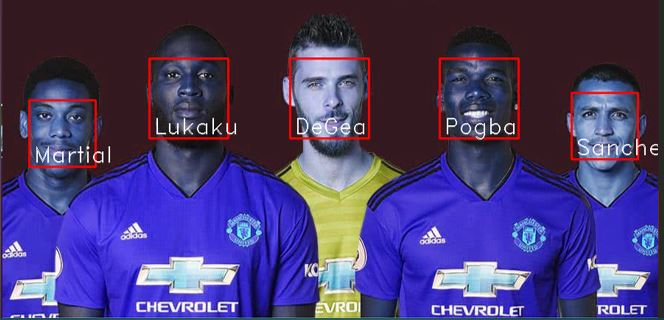

In [12]:
import face_recognition
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import matplotlib.pyplot as plt
import pickle
import dlib
import cv2
from sklearn.model_selection import train_test_split
import random

# Charger le DataSet

In [10]:
def charger_dataset(directory):
    # 2 listes pour memoriser les vecteurs caractéristiques et les labels
    encodings = []
    names = []
    train_dir = os.listdir(directory)
    for joueur in train_dir:
        print(joueur)
        pix = os.listdir(directory + '/'+joueur)
        i=0
        # Loop through each training image for the current person
        for joueur_img in pix:
            # Get the face encodings for the face in each image file
            directory_img = directory+ '/'+joueur + "/" + joueur_img;
            face = face_recognition.load_image_file(directory_img)
            face_bounding_boxes = face_recognition.face_locations(face)
            if len(face_bounding_boxes) == 1:
                face_enc = face_recognition.face_encodings(face)[0]
                # Add face encoding for current image 
                # with corresponding label (name) to the training data
                encodings.append(face_enc)
                names.append(joueur)
                i+=1;
    print(i)
    X,Y = np.array(encodings),np.array(names)
    return X,Y
            
  
    
    

In [11]:
X,Y = charger_dataset('C:/Users/Ibrahim/reconnaissance_faciale/football_golden_foot/football_golden_foot')

alessandro_del_piero
andreas_iniesta
andriy_shevchenko
cristiano_ronaldo
didier_drogba
diego_maradona
edinson_cavani
francesco_totti
gianlugi_buffon
iker_casillas
lionel_messi
luka_modric
mohamed_salah
pavel_nedved
pele
riyan_giggs
roberto_baggio
roberto_carlos
ronaldinho
ronaldo_nazario
samuel_eto
zlatan_ibrahimovic
234


# Apprentissage 

In [16]:
Y= LabelEncoder().fit_transform(Y)

x_train, x_test, y_train, y_test = train_test_split(X,   # input data
                                                    Y,                            # target/output data 
                                                    test_size=0.10, 
                                                    random_state=random.seed())

In [17]:
# Create and train the SVC classifier
clf = svm.SVC()
clf.probability=True
clf.fit(x_train, y_train)


SVC(probability=True)

# Evaluation

In [18]:
clf.score(x_train,y_train)

0.9417501317870322

In [20]:
clf.score(x_test,y_test)

0.9407582938388626

# Save Model 

In [27]:
def save_model(model, filename, path=""): 
    with open(os.path.join(path, filename), 'wb') as out_name:
        pickle.dump(model, out_name, pickle.HIGHEST_PROTOCOL)

save_model(clf, "model.pkl", path="")